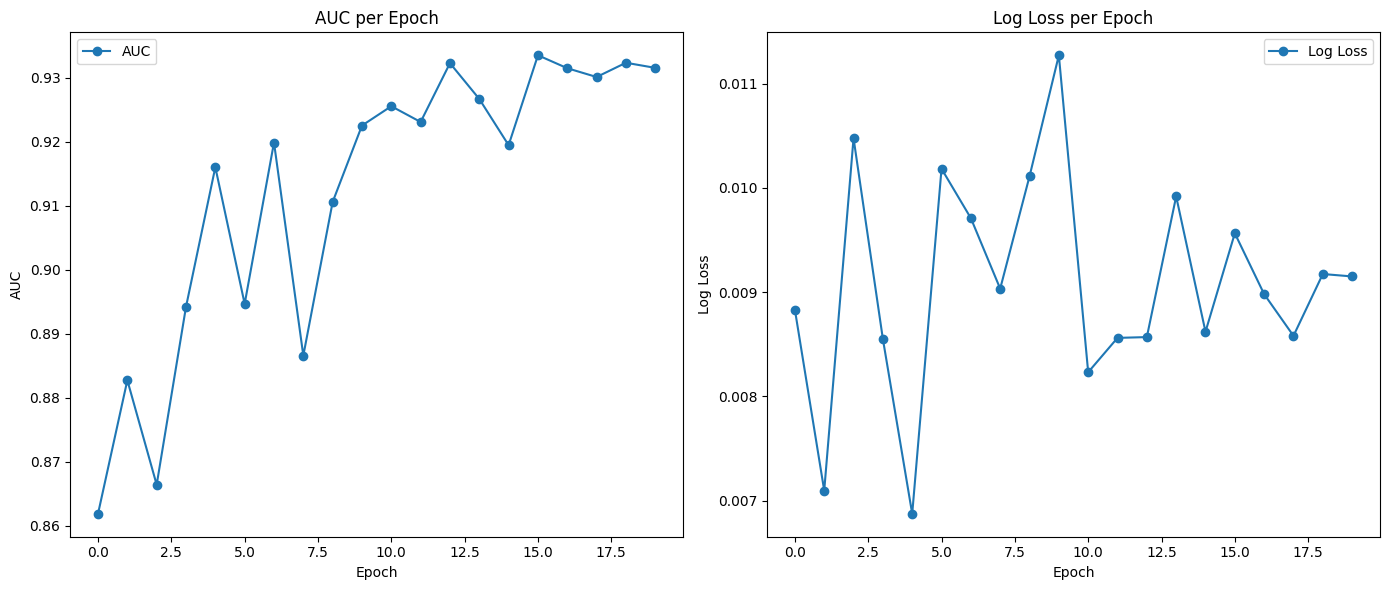

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, log_loss
import matplotlib.pyplot as plt
# データの読み込み
train_df = pd.read_csv("./fold/train_with_fold.csv", low_memory=False)

# 結果を保存するためのリスト
all_results = []

# 各フォールドごとにエポックの結果を集計
for fold in range(0, 4):
    dir_name = f"/home/working/results/01_convnext_base_baseline_fold_{fold}/test_results/"
    for epoch in range(0, 20):
        df = pd.read_csv(dir_name + f"epoch_{epoch}_results.csv")
        df['fold'] = fold
        df['epoch'] = epoch
        all_results.append(df)

# 結果を統合
results_df = pd.concat(all_results)
# AUCおよびログ損失を計算
auc_scores = []
logloss_scores = []
epochs = range(0, 20)

for epoch in epochs:
    epoch_df = results_df[results_df['epoch'] == epoch]
    
    # train_dfとマージしてターゲットを取得
    merged_df = pd.merge(epoch_df, train_df[['isic_id', 'target']], on='isic_id')
    
    # 統合結果の検証
    assert len(epoch_df) == len(merged_df), "Mismatch in number of rows after merge"
    assert len(train_df) == len(epoch_df)
    assert merged_df['target'].notnull().all(), "Missing target values in merged dataframe"
    
    y_true = merged_df['target'].values
    y_pred = merged_df['pred'].values
    
    auc = roc_auc_score(y_true, y_pred)
    logloss = log_loss(y_true, y_pred)
    
    auc_scores.append(auc)
    logloss_scores.append(logloss)

# AUCとログ損失のプロット
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, auc_scores, marker='o', label='AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('AUC per Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, logloss_scores, marker='o', label='Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss per Epoch')
plt.legend()

plt.tight_layout()
plt.show()